In [1]:
import numpy as np
from astropy.io import fits
from astropy.stats import mad_std
from photutils import datasets, DAOStarFinder, aperture_photometry, CircularAperture
import glob
import matplotlib.pyplot as plt



In [2]:
#images = []
#images = glob.glob('C:\\Users\\Agnieszka\\Documents\\UP\\Praca_lic\\MARAT\\2016-11-22\\*red.fit')

In [3]:
im_dir = 'C:\\Users\\Agnieszka\\Documents\\UP\\Praca_lic\\MARAT\\2016-11-22\\'

In [4]:
im = fits.getdata(im_dir+'2457712_003224+042958_001_P1-60_red.fit')

In [13]:
bkg_sigma = mad_std(im)    
daofind = DAOStarFinder(fwhm=4., threshold=4.*bkg_sigma)    
sources = daofind(im)    
print(sources)  

 id    xcentroid     ycentroid    ...      flux           mag      
---- ------------- -------------- ... ------------- ---------------
   1 872.753961671 0.343309180544 ... 35.0514461931  -3.86176485324
   2 1.57334658131  1.63206718713 ... 4.47009680824  -1.62579232172
   3 280.886295631 0.931754916158 ... 9.34143611367  -2.42603411999
   4 1021.39754907  1.42366027842 ... 4.59746129072  -1.65629520323
   5 799.047469709  3.38331614058 ... 1.89687384034  -0.69509611812
   6 41.5537586308  3.52887837864 ... 3.03873663447  -1.20673265415
   7 343.004771919  4.22717570066 ... 1.15116896385  -0.15284768067
   8 601.022399064   4.3360045895 ...  2.8940442987  -1.15376293629
   9 845.894927331  3.78273854159 ... 4.75448373027  -1.69275841398
  10 762.239868631  4.84331878222 ... 1.11557468949 -0.118746630739
 ...           ...            ... ...           ...             ...
2660   970.0744079  1017.00711545 ... 1.74465013018 -0.604270867973
2661 539.549305644  1018.82251764 ... 14.9184633

In [14]:
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)

In [15]:
phot_table = aperture_photometry(im, apertures)
print(phot_table)

 id       xcenter             ycenter        aperture_sum
            pix                 pix                      
---- ------------------ ------------------- -------------
   1  872.7539616712497 0.34330918054442483 43891.2311147
   2 1.5733465813062397  1.6320671871307992 22966.4187445
   3 280.88629563114085  0.9317549161575409 30976.1456579
   4 1021.3975490730304   1.423660278424848 21402.3912067
   5  799.0474697093151   3.383316140576467 33890.6867702
   6  41.55375863078628  3.5288783786377227 38959.8625548
   7 343.00477191878457  4.2271757006607285 34836.1317809
   8  601.0223990642027    4.33600458950149 35727.5364069
   9  845.8949273314192   3.782738541589958 38224.3580582
  10  762.2398686308946   4.843318782216699 33142.2887073
 ...                ...                 ...           ...
2661  539.5493056444941    1018.82251763637 49662.0643809
2662  590.5408654596165  1019.4419637904122 38477.8793486
2663   994.692519910437  1019.4999945938055 43081.8788109
2664  1019.497

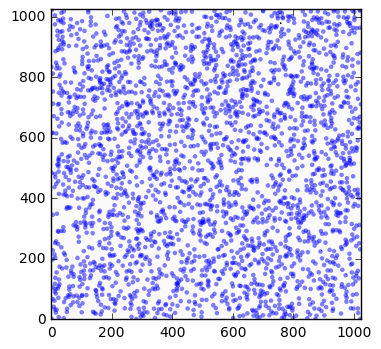

In [16]:
plt.imshow(im, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.show()

